###### Author : Omar M.Hussein
###### DAV 5400 Fall 2019 Week 6 Assignment (30 Points)

The data set we’ll be using contains prices and other
attributes of nearly 54,000 diamonds

In [1]:
import pandas as pd
import numpy as np
# reading the data from the CSV file
data =pd.read_csv('diamonds.csv')
# Viewing the first 5 elements in the data frame
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Checking to see if there are any null values present.
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Since there are no nulls we can use the shape attribute for the pandas class without worrying

### Task 1
1. What proportion of diamonds are between .30 and 1.08 carats?

##### Approach
For this Task The plan of attack here is to find the number of rows of the required subset after preforming preliminary data transformations and then dividing it by the total number of rows (Total number of Data Points)

##### Finding the total Number of Rows

In [3]:
# The number of data points in the entire data
print(data.shape[0])

53940


##### preforming preliminary data transformations and finding the number of Data points within it

In [4]:
# Subset the data for Question 1
q1 = data[(data['carat'] > 0.30) & (data['carat'] < 1.08)]
# The number of data points inside the subset
q1.shape[0]

37434

#### Calculating the portion and the percentage from the total number of Data points

In [5]:
# the portion of the data
portion = q1.shape[0] / data.shape[0]
print("The portion of the subset between .30 and 1.08 carats is : {0:.2f} \
      \nWhich is about {1:.2f}% of the total data".format(portion,portion * 100))

The portion of the subset between .30 and 1.08 carats is : 0.69       
Which is about 69.40% of the total data


### Task 2
#### 2. How many of the diamonds have equal x and y dimensions?

##### Approach 
Is to create a function that is mutable and can accept any of dimensions
do preliminary data transformation through subsetting and then returning the number of instances where the criteria matches

##### Creating the function dim_count to count the number of data points such that x is equal to x and y is equal to y

In [6]:
def dim_count(data,x,y):
    '''
    dim_count: Function Created to find all the data points that have specific dimensions of X and Y
    
    Input type:
    data : pandas.dataframe
    x,y : float/double values
    
    Return type:
    Int value
    '''
    q1 = data[(data['x'] == x) & (data['y'] == y)]
    return q1.shape[0]

The expected value

In [7]:
### TEST SET ####
# Subset the data for Question 1
q1 = data[(data['x'] == 3.95) & (data['y'] == 3.98)]
# The number of data points inside the subset
q1.shape[0]

14

The actual value

In [8]:
# Testing #
dim_count(data,3.95,3.98)

14

### Task 3
3. How many of the diamonds have a carat less than the mean carat value?

##### Approach 

First thing we do is we compute the mean carat value.
<br>then we extract all the values that are less than the mean and finally we count them.

In [9]:
# Calcuating of the Carat series.
mn_carat = data['carat'].mean()
# Displaying the mean
mn_carat

0.7979397478679852

##### Subsetting the data to only that that has less than the mean carat value

In [10]:
q3 =  data[data['carat'] < mn_carat]
q3.shape[0]

31127

In [11]:
# you could also do this
# print(q3.count()[0])
# Or you could do this
# q3['carat'].count()
# q3['carat'].shape[0]

### Task 4
How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are
ranked in ascending order as follows:<br> Fair / Good / Very Good / Premium / Ideal

##### Approach 
First we subset the data into only the required cuts and then we count the number of total cuts available

In [12]:
# Subsetting Only the required
q4 = data[(data['cut'] == 'Premium ') | (data['cut'] == 'Ideal')]
# Counting the number of Cuts in that specific series
q4.cut.count()

21551

In [13]:
# We could also do this if we wanted to save some memory
data[(data['cut'] == 'Premium ') | (data['cut'] == 'Ideal')]['cut'].count()

21551

### Task 5
5. Which diamond has the highest price per carat? What is its value?

##### Approach
A.We should compute the price per carat and create a new series for it <br>
B.Then we find the highest of them all <br>
C.Finally we find its index <br>
D.Then we find its price <br>


In [14]:
data.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [15]:
#A
# getting the highest price per carat by creating a new series
data['carat_price']= data.carat / data.price
#B
highest = data['carat_price'].max()
# showing the highest value
print(highest)

#C
# Getting the Index of the row that has the highest carat price
idx = data.index[data['carat_price'] == highest].tolist()
# After getting the index now we should get the
# Now we are going to 'loc'ate that index that specific diamond and get all its details
data.loc[idx]

0.0009513274336283185


,carat,cut,color,clarity,depth,table,price,x,y,z,carat_price
31962,0.43,Premium,H,I1,62.0,59.0,452,4.78,4.83,2.98,0.000951


Now we find its price

In [16]:
# D getting the price
data.loc[idx]['price']

31962    452
Name: price, dtype: int64

#### Conclusion of Task 5

In [17]:
print("Element number {0} is the highest carat per price and its value is {1}".format(idx,data.loc[idx]['price'].tolist()))

Element number [31962] is the highest carat per price and its value is [452]


### Task 6
Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within
the data set?

#### Approach
Including the cut data and then creating a plot using pandas, matplotlib
Then we should be Creating the frequency bar char

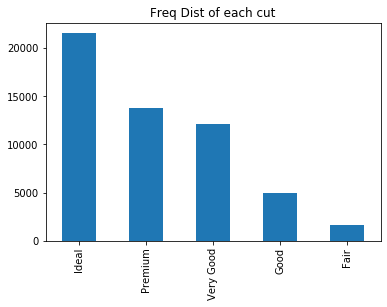

In [18]:
# Including Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Creating the frequency bar char
bar1 = data['cut'].value_counts().plot.bar(title = "Freq Dist of each cut")
bar1;

#####  Task 6 Conclusion
That a great deal of the cuts are 'ideal' as their a huge gap between itself and the cut with the second highest frequency

### Task 7
Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance
of the boxplots.

#### Approach
Draw boxplot <br>
Draw Conclusions

Text(0.5, 1.0, 'Prices')

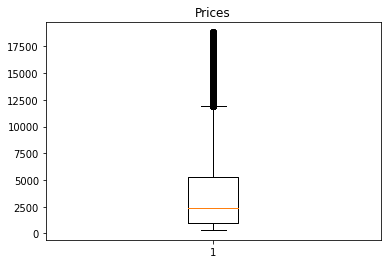

In [19]:
# Using matplot lib
plt.boxplot(data['price'])
plt.title('Prices')

In [20]:
data['price'].max()

18823

#### Conclusions:
##### Reading
- The Minimum value is probably around the 300s
- The 25% quartile range is near the minimum
- The Median quartile range below 2500
- The 75% 3rd quartile range is slightly above 5000
- The Maximum value seem to be more of an outliers

* The box-plot suggest that the overall prices are rather low because they are much closer to the minimum and it seems like the maximum is an outlier and more of an anomly

In conclusion low prices are abundunce , medium prices are present in normal amounts and high prices are very little


### Task 8
Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can
draw from the shape of the resulting distributions.

##### Approach
Creating the Histogram according to this rule

<br>
The Freedman-Diaconis rule is very robust and works well in practice.<br> The bin-width is set to h=2×IQR×n ** −1/3.<br>So the number of bins is (max−min)/h,<br> where n is the number of observations, max is the maximum value and min is the minimum value.

##### Refrences
https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
https://stats.stackexchange.com/questions/143438/optimal-number-of-bins-in-histogram-by-the-freedman-diaconis-rule-difference-be


In [21]:

def freedman(data,col):
    '''
    Purpose: get the number of bins required
    
    Input:
    Data : data frame
    col : str
    return int
    '''
    col = str(col)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    h = 2 * IQR * data.shape[0]**(-1/3)
    rang = data[col].max() - data[col].min()
    num_bins = rang / h
    
    return int(num_bins)

## Length
Getting the histogram for the length


In [22]:
print("The number of bins used here {0}".format(freedman(data,'x')))

The number of bins used here 110


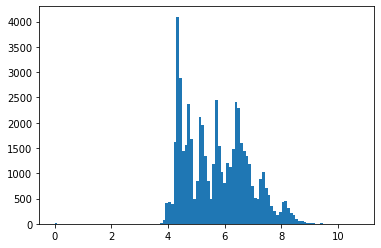

In [23]:
hist1 = plt.hist(data['x'], bins=freedman(data,'x'))
hist1;

### Conclusion for the Length
The data is centralized around 6 on the x axis and the values seem to range between 4000s and the 100s and the Y axis

## Width
Getting the histogram for the Width

In [24]:
print("The number of bins used here {0}".format(freedman(data,'y')))

The number of bins used here 611


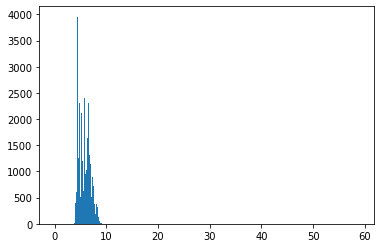

In [25]:
hist2 = plt.hist(data['y'], bins=freedman(data,'y'))
hist2;

### Conclusion for width
The data seem to be centralized around 7 on the x axisa and seem to range wildly, however it is a bit skewed in favor of the left side

## Depth
Getting the histogram for the Depth

In [26]:
print("The number of bins used here {0}".format(freedman(data,'z')))

The number of bins used here 531


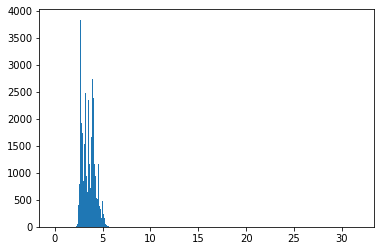

In [27]:
hist3 =plt.hist(data['z'], bins=freedman(data,'z'))
hist3;

## Conclusion for the depth
The data seem to be centralized around 4 on the x axis but there seems to be very little variety on the x axis and seem to range more on the Y axis, however it is a bit skewed in favor of the left side


## Task 9
9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

#### Approach
Use both series in a scatterplot using SeaBorn and then get the correlation between the two then plot them


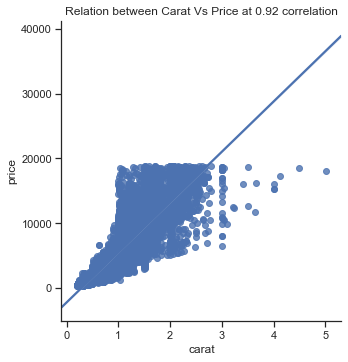

In [28]:
# importing seaborn a good plotting library
import seaborn as sns
# Setting the style
sns.set(style="ticks")
#plotting the scatter plot
sns.lmplot("carat", "price", data=data)
# Setting a title
ax = plt.gca()
ax.set_title("Relation between Carat Vs Price at 0.92 correlation")
# Showing the scatter plot
plt.show()


In [29]:
# Showing the relationship

# Getting the relation ship and getting the minimum 
# because the highest relation is between something and itself
relation = data[["price","carat"]].corr(method='pearson').min()[0]
relation

0.9215913011935697

### Conclusion for Task 9
The relationship between price and carat is a very strong linear relation ship which means it is whenever Carat increases, price increase.
Despite the fact that correlation does not imply causation it is very sensible to assume here that the weight is the actual cause because in this particular scenario it is the case

## Appendix
### Data Dictionary
A data frame with 53940 rows and 10 variables:

price
price in US dollars (\$326--\$18,823)

carat
weight of the diamond (0.2--5.01)

cut
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color
diamond colour, from D (best) to J (worst)

clarity
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x
length in mm (0--10.74)

y
width in mm (0--58.9)

z
depth in mm (0--31.8)

depth
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table
width of top of diamond relative to widest point (43--95)